<a href="https://colab.research.google.com/github/NeutrinoExplorer/NeutrinoOscillation/blob/main/Code%20for%20calculations/nu_oscillation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

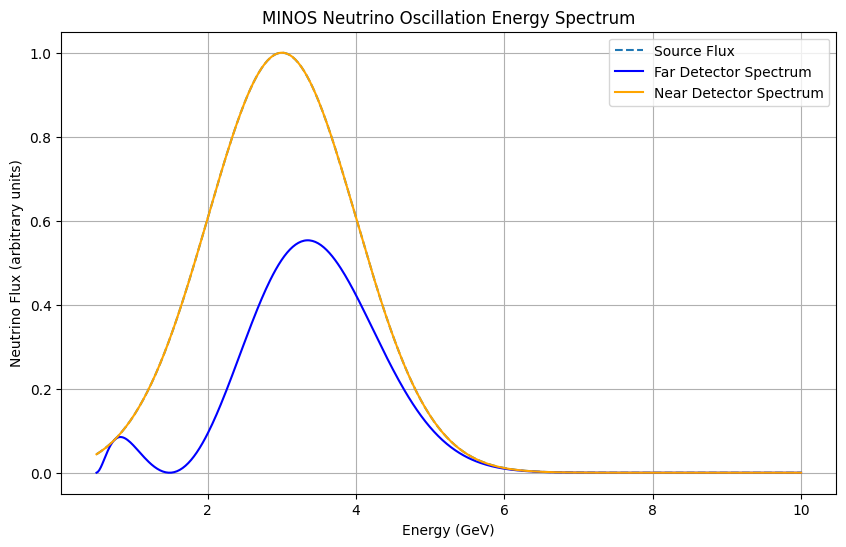

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Delta_m32_sq = 2.5e-3  # eV^2
theta23 = np.pi / 4  # Maximal mixing angle
L_far = 735  # Far Detector Baseline in km
L_near = 1  # Near Detector Baseline in km
energy = np.linspace(0.5, 10, 500)  # Energy in GeV

# Source flux (approximate Gaussian)
def source_flux(E, peak=3.0, width=1.0):
    return np.exp(-0.5 * ((E - peak) / width) ** 2)

# Oscillation probability
def survival_prob(E, L, Delta_m_sq, theta):
    return 1 - np.sin(2 * theta)**2 * np.sin(1.27 * Delta_m_sq * L / E)**2

# Calculate spectra
flux = source_flux(energy)
prob_far = survival_prob(energy, L_far, Delta_m32_sq, theta23)
prob_near = survival_prob(energy, L_near, Delta_m32_sq, theta23)

spectrum_far = flux * prob_far
spectrum_near = flux * prob_near

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energy, flux, label="Source Flux", linestyle="--")
plt.plot(energy, spectrum_far, label="Far Detector Spectrum", color="blue")
plt.plot(energy, spectrum_near, label="Near Detector Spectrum", color="orange")
plt.xlabel("Energy (GeV)")
plt.ylabel("Neutrino Flux (arbitrary units)")
plt.title("MINOS Neutrino Oscillation Energy Spectrum")
plt.legend()
plt.grid()
plt.show()


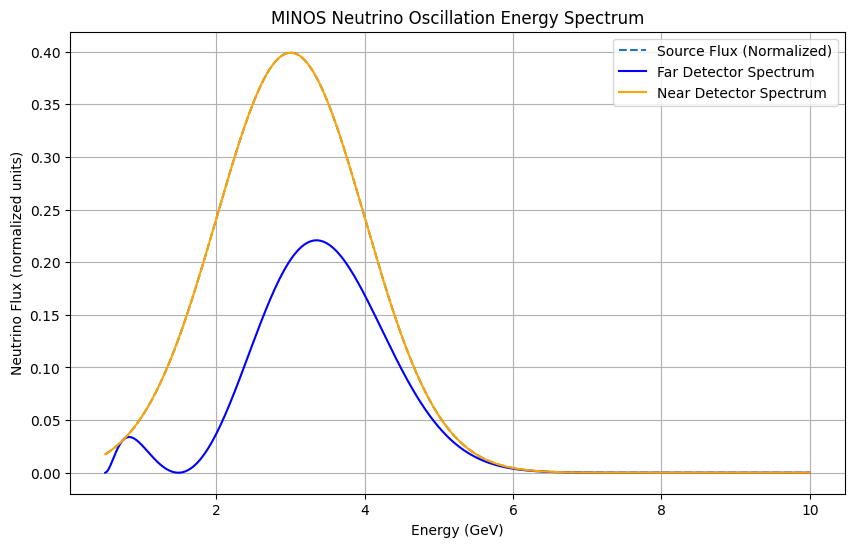

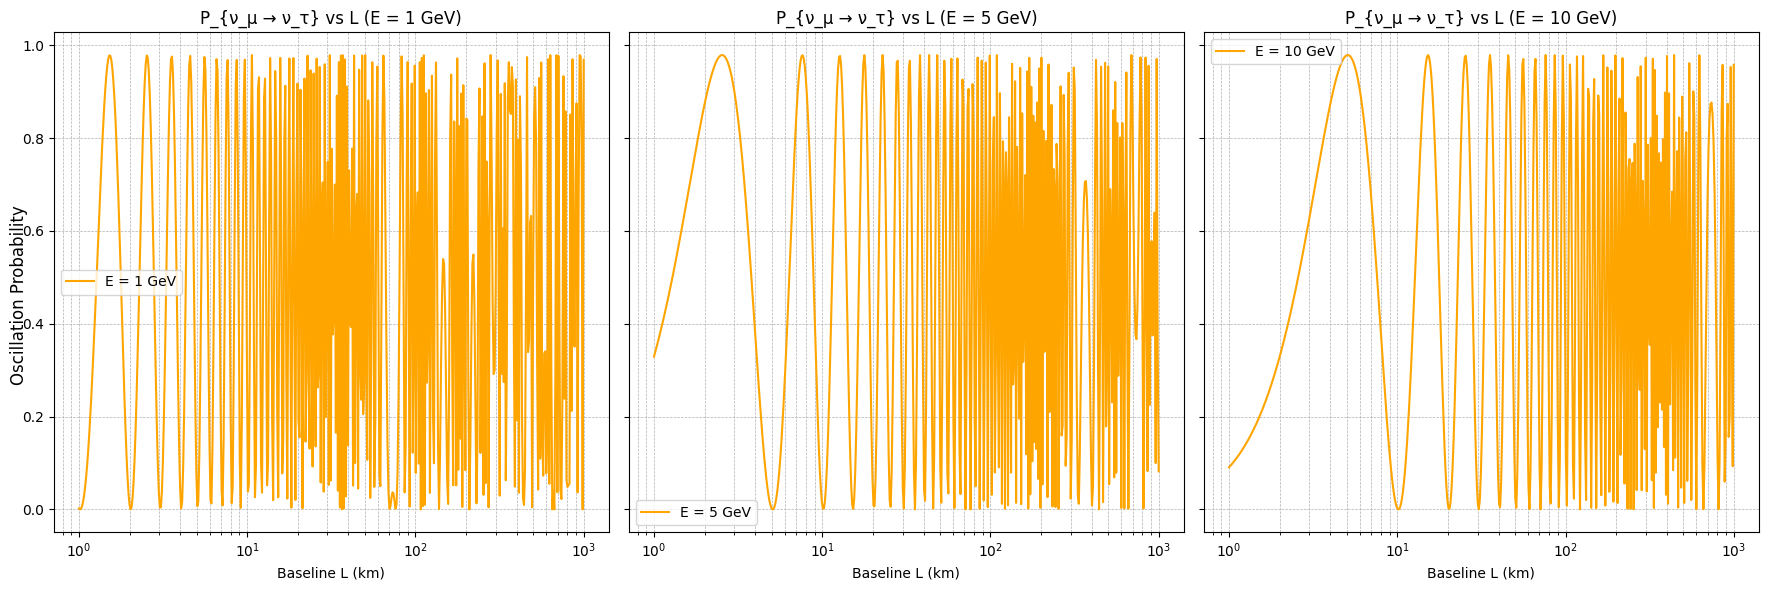

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Oscillation probability formula
def prob_nu_mu_to_nu_tau(L, E):
    return 0.9792 * np.sin(3.093 * L / E)**2

# Values of E (in GeV)
energies = [1, 5, 10]
L_values = np.logspace(0, 3, 500)  # L from 10^0 to 10^3 km

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, E in enumerate(energies):
    P = prob_nu_mu_to_nu_tau(L_values, E)
    axes[i].plot(L_values, P, color="orange", label=f"E = {E} GeV")
    axes[i].set_xscale('log')
    axes[i].set_xlabel("Baseline L (km)")
    axes[i].set_title(f"P_{{\u03BD_\u03BC \u2192 \u03BD_\u03C4}} vs L (E = {E} GeV)")
    axes[i].grid(True, which="both", linestyle="--", linewidth=0.5)
    axes[i].legend()

# Shared y-label
fig.supylabel("Oscillation Probability")
plt.tight_layout()
plt.show()

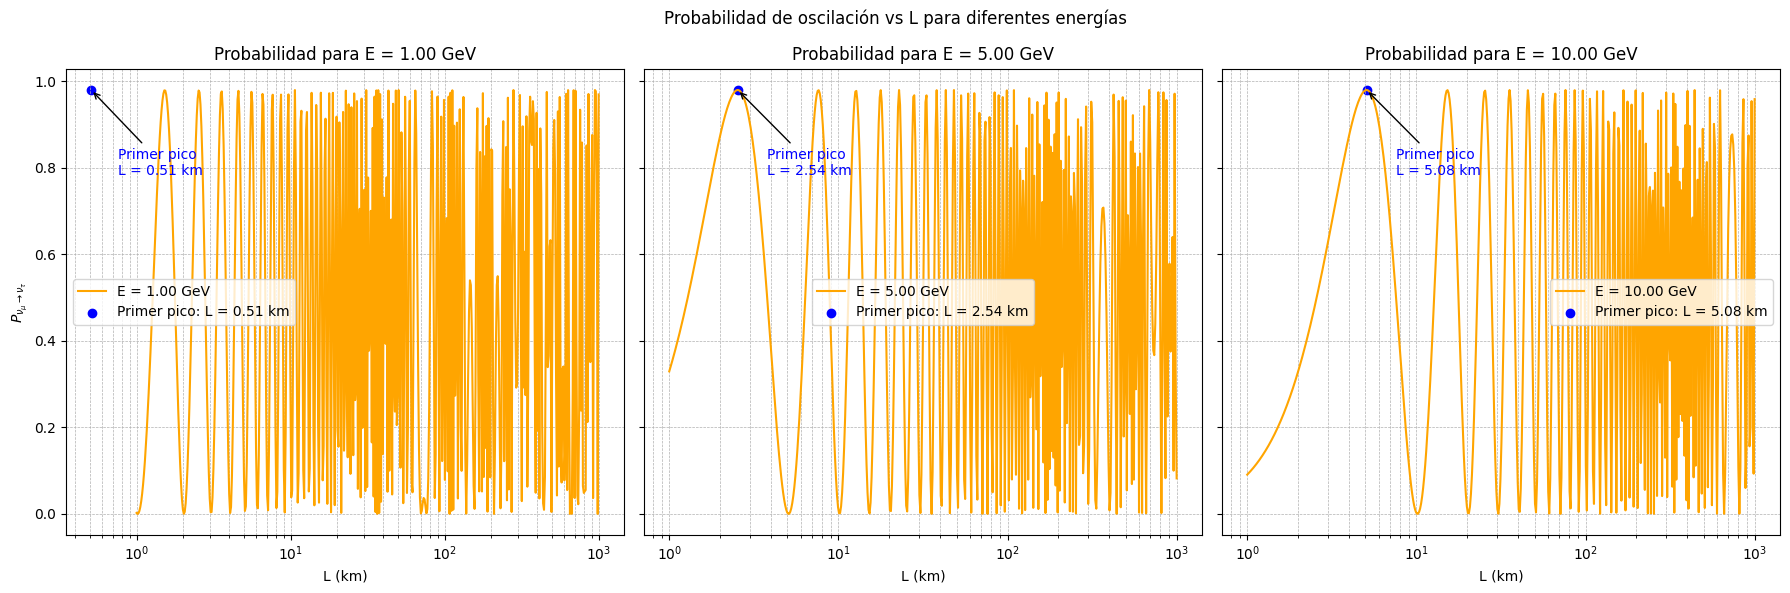

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de energía
energies = [1, 5,10]  # Energías en GeV

# Valores de L
L = np.logspace(0, 3, 500)  # Distancias en km (10^0 a 10^3)

# Función de probabilidad de oscilación
def prob_nu_mu_to_nu_tau(L, E):
    return 0.9792 * np.sin(3.093 * L / E)**2

# Crear una figura con subplots en una fila
fig, axes = plt.subplots(1, len(energies), figsize=(18, 6), sharey=True)

for i, E in enumerate(energies):
    ax = axes[i]
    # Calcular la probabilidad para la energía actual
    P = prob_nu_mu_to_nu_tau(L, E)

    # Calcular el primer pico máximo analíticamente
    L_first_max = (np.pi / 2) * (E / 3.093)
    P_first_max = prob_nu_mu_to_nu_tau(L_first_max, E)

    # Graficar la curva de probabilidad
    ax.plot(L, P, color='orange', label=f'E = {E:.2f} GeV')

    # Resaltar el primer pico máximo
    ax.scatter(L_first_max, P_first_max, color='blue', label=f'Primer pico: L = {L_first_max:.2f} km')

    # Añadir una flecha y texto para indicar el primer pico
    ax.annotate(f'Primer pico\nL = {L_first_max:.2f} km',
                xy=(L_first_max, P_first_max), xytext=(L_first_max * 1.5, P_first_max * 0.8),
                arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10, color='blue')

    # Configurar etiquetas y título
    ax.set_xscale('log')
    ax.set_title(f'Probabilidad para E = {E:.2f} GeV')
    ax.set_xlabel('L (km)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()

axes[0].set_ylabel('$P_{\\nu_\\mu \\to \\nu_\\tau}$')
plt.suptitle('Probabilidad de oscilación vs L para diferentes energías')
plt.tight_layout()
plt.show()




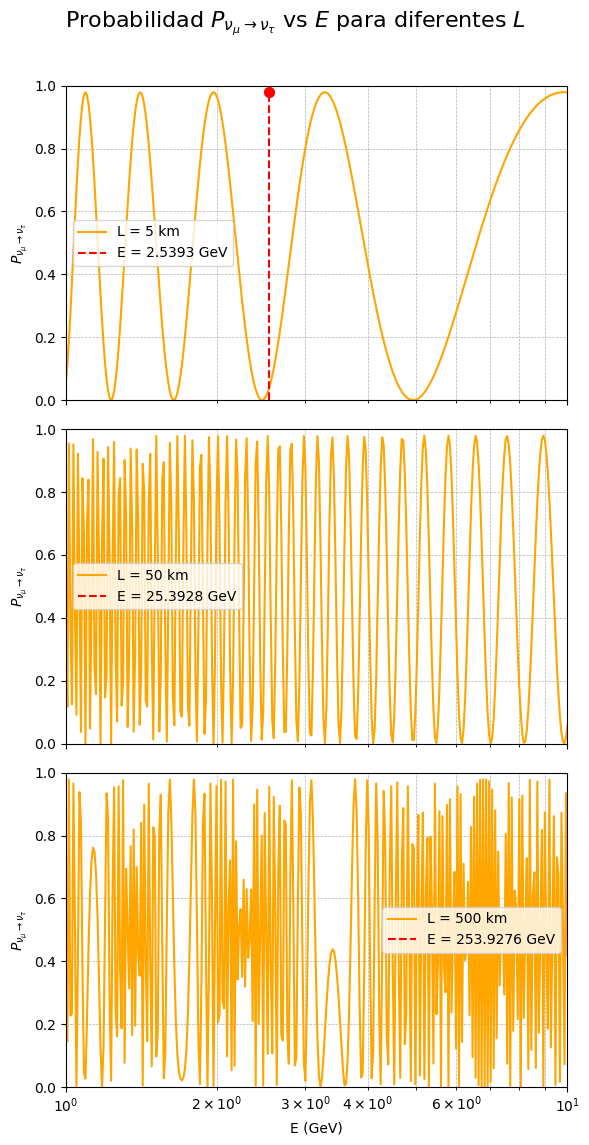

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación
A = 0.9792
B = 3.093

# Valores de L en km
L_values = [5, 50, 500]

# Rango de E (de 10^0 a 10^1 GeV)
E = np.logspace(-2, 1, 1000)  # 1000 puntos entre 10^0 y 10^1

# Crear la figura y los ejes
fig, axs = plt.subplots(len(L_values), 1, figsize=(6, 12), sharex=True)

for i, L in enumerate(L_values):
    # Calcular la probabilidad para cada E con el valor de L
    P_mu_tau = A * np.sin(B * L / E)**2

    # Calcular el valor de E donde 3.093 * L / E = pi / 2
    E_peak = (np.pi / 2) * L / B

    # Graficar la curva de P_mu_tau vs E
    axs[i].plot(E, P_mu_tau, color='orange', label=f'L = {L} km')
    axs[i].axvline(x=E_peak, color='red', linestyle='--', label=f'E = {E_peak:.4f} GeV')
    axs[i].scatter(E_peak, A * np.sin(np.pi / 2)**2, color='red', s=50, zorder=5)  # Punto de máximo

    # Configuración de la gráfica
    axs[i].set_xscale('log')
    axs[i].set_xlim([10**0, 10**1])
    axs[i].set_ylim([0, 1])
    axs[i].set_ylabel(r'$P_{\nu_\mu \to \nu_\tau}$')
    axs[i].legend()
    axs[i].grid(True, which="both", linestyle="--", linewidth=0.5)

# Configuración del eje x de la última gráfica
axs[-1].set_xlabel('E (GeV)')

# Título general de la figura
fig.suptitle(r'Probabilidad $P_{\nu_\mu \to \nu_\tau}$ vs $E$ para diferentes $L$', fontsize=16)

# Ajustar los márgenes
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Mostrar la figura
plt.show()


In [ ]:
# Importar las bibliotecas necesarias
import numpy as np

# Parámetros de la ecuación
B = 3.093  # Constante dada en la ecuación

# Valores de L en km
L_values = [5, 50, 500]

# Lista para almacenar los valores de E correspondientes al pico máximo
E_peaks = []

# Calcular el valor de E donde ocurre el pico máximo para cada L
for L in L_values:
    # Despejar E de la ecuación 3.093 * L / E = pi / 2
    E_peak = (np.pi / 2) * L / B
    E_peaks.append(E_peak)
    print(f'Para L = {L} km, el valor de E donde ocurre el máximo es E = {E_peak:.4f} GeV')

# Mostrar los resultados
print("\nResumen de los valores de E para cada L:")
for i, L in enumerate(L_values):
    print(f"L = {L} km --> E = {E_peaks[i]:.4f} GeV")

Para L = 5 km, el valor de E donde ocurre el máximo es E = 2.5393 GeV
Para L = 50 km, el valor de E donde ocurre el máximo es E = 25.3928 GeV
Para L = 500 km, el valor de E donde ocurre el máximo es E = 253.9276 GeV

Resumen de los valores de E para cada L:
L = 5 km --> E = 2.5393 GeV
L = 50 km --> E = 25.3928 GeV
L = 500 km --> E = 253.9276 GeV


In [ ]:
# Importar las bibliotecas necesarias
import numpy as np

# Parámetros de la ecuación
B = 3.093  # Constante dada en la ecuación

# Valores de L en km
L_values = [5, 50, 500]

# Lista para almacenar los valores de E correspondientes al último pico
E_last_peaks = []

# Calcular el valor de E para el último pico antes de que la probabilidad caiga a 0
for L in L_values:
    # Determinar el mayor valor de n tal que el cero de la probabilidad esté en el rango de E = [10^0, 10^1]
    n_max = int((10 * B) / (np.pi * L))  # Aproximar la máxima n que satisface la condición para E
    n_max = max(n_max, 1)  # Asegurarse de que al menos se tome n = 1

    # Condición para el último pico antes de que la curva caiga a 0
    E_last_peak = ((2 * n_max + 1) * np.pi) / (2 * B) * L

    # Almacenar el valor de E para el último pico
    E_last_peaks.append(E_last_peak)
    print(f'Para L = {L} km, el último pico antes de que la curva caiga a 0 ocurre en E = {E_last_peak:.4f} GeV')

# Mostrar los resultados
print("\nResumen de los valores de E para el último pico antes de que la probabilidad caiga a 0:")
for i, L in enumerate(L_values):
    print(f"L = {L} km --> E = {E_last_peaks[i]:.4f} GeV")


Para L = 5 km, el último pico antes de que la curva caiga a 0 ocurre en E = 7.6178 GeV
Para L = 50 km, el último pico antes de que la curva caiga a 0 ocurre en E = 76.1783 GeV
Para L = 500 km, el último pico antes de que la curva caiga a 0 ocurre en E = 761.7829 GeV

Resumen de los valores de E para el último pico antes de que la probabilidad caiga a 0:
L = 5 km --> E = 7.6178 GeV
L = 50 km --> E = 76.1783 GeV
L = 500 km --> E = 761.7829 GeV


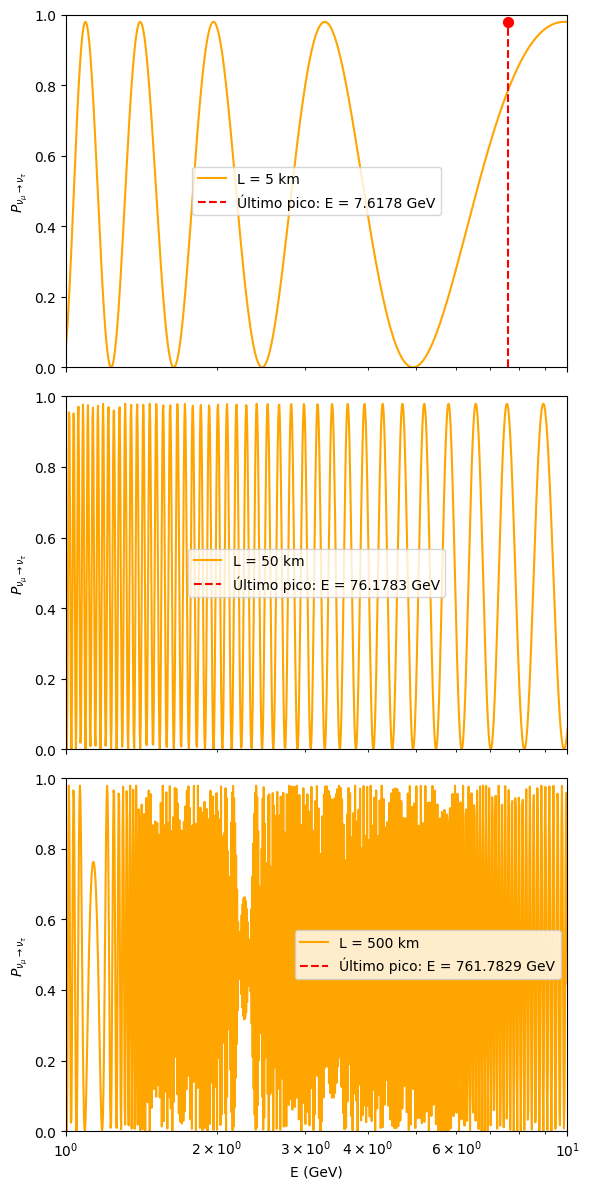

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación
A = 0.9792
B = 3.093

# Valores de L en km
L_values = [5, 50, 500]

# Rango de E (de 10^0 a 10^1 GeV)
E = np.logspace(0, 1, 1000)  # 1000 puntos entre 10^0 y 10^1

# Crear la figura y los ejes
fig, axs = plt.subplots(len(L_values), 1, figsize=(6, 12), sharex=True)

for i, L in enumerate(L_values):
    # Calcular la probabilidad para cada E con el valor de L
    P_mu_tau = A * np.sin(B * L / E)**2

    # Calcular el último pico antes de la caída a 0
    n_max = int((10 * B) / (np.pi * L))  # Determinar el valor de n máximo
    n_max = max(n_max, 1)
    E_last_peak = ((2 * n_max + 1) * np.pi) / (2 * B) * L

    # Graficar la curva de P_mu_tau vs E
    axs[i].plot(E, P_mu_tau, color='orange', label=f'L = {L} km')
    axs[i].axvline(x=E_last_peak, color='red', linestyle='--', label=f'Último pico: E = {E_last_peak:.4f} GeV')
    axs[i].scatter(E_last_peak, A * np.sin(np.pi / 2)**2, color='red', s=50, zorder=5)  # Punto del último pico

    axs[i].set_xscale('log')
    axs[i].set_xlim([10**0, 10**1])
    axs[i].set_ylim([0, 1])
    axs[i].set_ylabel(r'$P_{\nu_\mu \to \nu_\tau}$')
    axs[i].legend()

axs[-1].set_xlabel('E (GeV)')
plt.tight_layout()
plt.show()

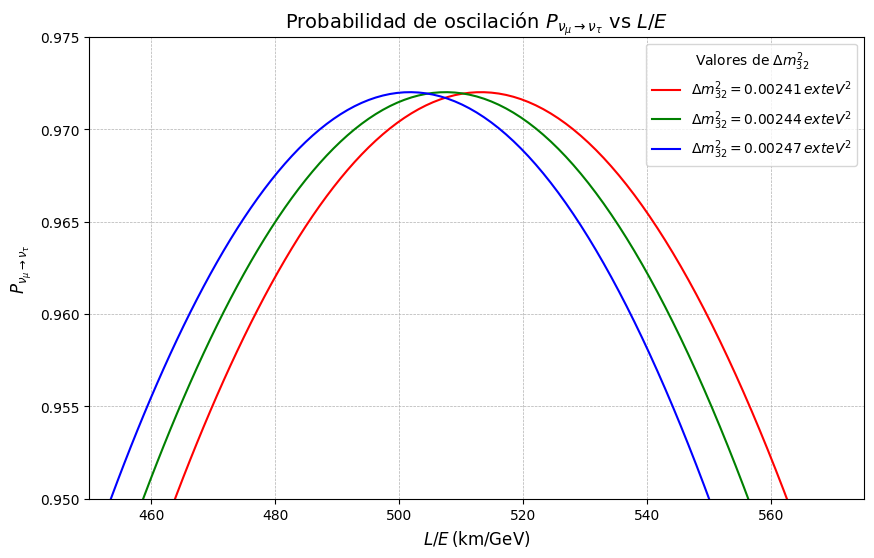

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación
delta_m32_squared_values = [2.41e-3, 2.437e-3, 2.465e-3]  # en eV^2
L_over_E = np.logspace(2, 3, 1000)  # L/E en km/GeV, de 10^2 a 10^3

# Colores para diferenciar las curvas
colors = ['r', 'g', 'b']  # Rojo, verde y azul

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Calcular y graficar P_{\nu_\mu \to \nu_\tau} para cada valor de \Delta m_{32}^2
for i, delta_m32_squared in enumerate(delta_m32_squared_values):
    P = 0.972 * np.sin(1.27 * delta_m32_squared * L_over_E) ** 2
    plt.plot(L_over_E, P, label=f'$\Delta m_{{32}}^2 = {delta_m32_squared:.5f} \, \text{{eV}}^2$', color=colors[i])

# Personalizar la gráfica
plt.xlabel(r'$L/E \, (\text{km/GeV})$', fontsize=12)
plt.ylabel(r'$P_{\nu_\mu \to \nu_\tau}$', fontsize=12)
plt.title(r'Probabilidad de oscilación $P_{\nu_\mu \to \nu_\tau}$ vs $L/E$', fontsize=14)
plt.legend(title=r'Valores de $\Delta m_{32}^2$', fontsize=10)  # Leyenda con título
plt.grid(True, linestyle='--', linewidth=0.5)  # Agregar una cuadrícula

# Ajustar los límites para resaltar la región de interés
plt.xlim(450, 575)  # Restringir el rango de L/E de 450 a 575
plt.ylim(0.950, 0.975)    # La probabilidad entre 0.950 y 0.975

# Mostrar la gráfica
plt.show()


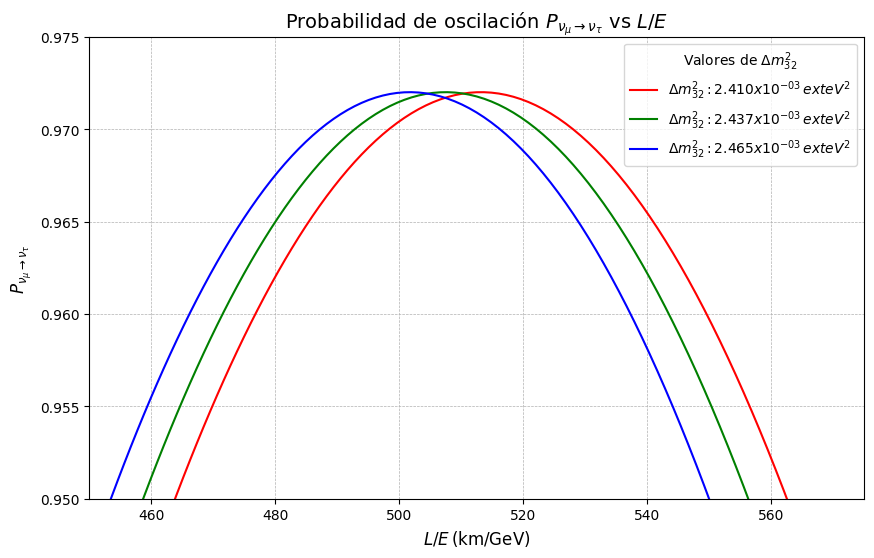

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación
delta_m32_squared_values = [2.41e-3, 2.437e-3, 2.465e-3]  # en eV^2
L_over_E = np.logspace(2, 3, 1000)  # L/E en km/GeV, de 10^2 a 10^3

# Colores para diferenciar las curvas
colors = ['r', 'g', 'b']  # Rojo, verde y azul

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Calcular y graficar P_{\nu_\mu \to \nu_\tau} para cada valor de \Delta m_{32}^2
for i, delta_m32_squared in enumerate(delta_m32_squared_values):
    P = 0.972 * np.sin(1.27 * delta_m32_squared * L_over_E) ** 2
    # Formatear el valor en notación científica como se requiere
    label_value = f'{delta_m32_squared:.3e}'.replace('e', 'x10^{') + '}'
    plt.plot(L_over_E, P, label=f'$\Delta m_{{32}}^2 : {label_value} \, \text{{eV}}^2$', color=colors[i])

# Personalizar la gráfica
plt.xlabel(r'$L/E \, (\text{km/GeV})$', fontsize=12)
plt.ylabel(r'$P_{\nu_\mu \to \nu_\tau}$', fontsize=12)
plt.title(r'Probabilidad de oscilación $P_{\nu_\mu \to \nu_\tau}$ vs $L/E$', fontsize=14)
plt.legend(title=r'Valores de $\Delta m_{32}^2$', fontsize=10)  # Leyenda con título
plt.grid(True, linestyle='--', linewidth=0.5)  # Agregar una cuadrícula

# Ajustar los límites para resaltar la región de interés
plt.xlim(450, 575)  # Restringir el rango de L/E de 450 a 575
plt.ylim(0.950, 0.975)    # La probabilidad entre 0.950 y 0.975

# Mostrar la gráfica
plt.show()


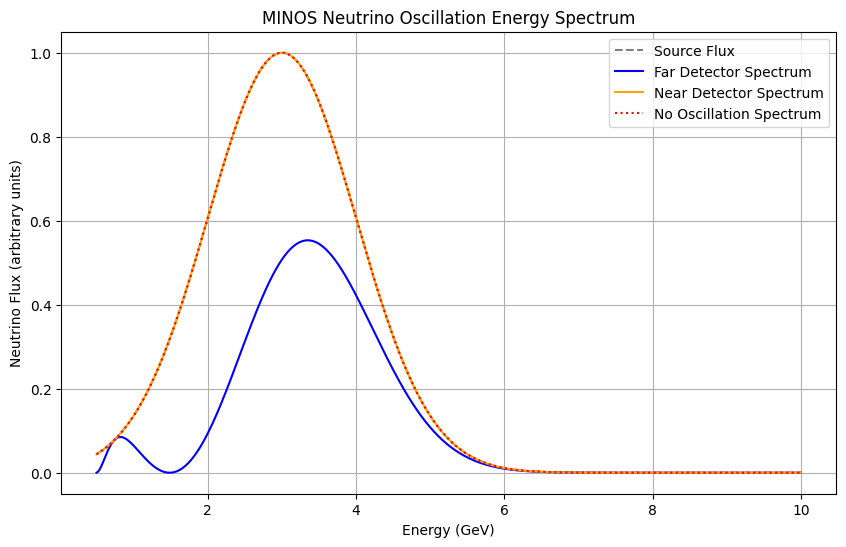

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Delta_m32_sq = 2.5e-3  # eV^2
theta23 = np.pi / 4  # Maximal mixing angle
L_far = 735  # Far Detector Baseline in km
L_near = 1  # Near Detector Baseline in km
energy = np.linspace(0.5, 10, 500)  # Energy in GeV

# Source flux (approximate Gaussian)
def source_flux(E, peak=3.0, width=1.0):
    return np.exp(-0.5 * ((E - peak) / width) ** 2)

# Oscillation probability
def survival_prob(E, L, Delta_m_sq, theta):
    return 1 - np.sin(2 * theta)**2 * np.sin(1.27 * Delta_m_sq * L / E)**2

# Calculate spectra
flux = source_flux(energy)
prob_far = survival_prob(energy, L_far, Delta_m32_sq, theta23)
prob_near = survival_prob(energy, L_near, Delta_m32_sq, theta23)

spectrum_far = flux * prob_far
spectrum_near = flux * prob_near

# Spectrum without oscillation (just the flux)
spectrum_no_oscillation = flux

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energy, flux, label="Source Flux", linestyle="--", color='gray')
plt.plot(energy, spectrum_far, label="Far Detector Spectrum", color="blue")
plt.plot(energy, spectrum_near, label="Near Detector Spectrum", color="orange")
plt.plot(energy, spectrum_no_oscillation, label="No Oscillation Spectrum", color='red', linestyle=':')

plt.xlabel("Energy (GeV)")
plt.ylabel("Neutrino Flux (arbitrary units)")
plt.title("MINOS Neutrino Oscillation Energy Spectrum")
plt.legend()
plt.grid()
plt.show()


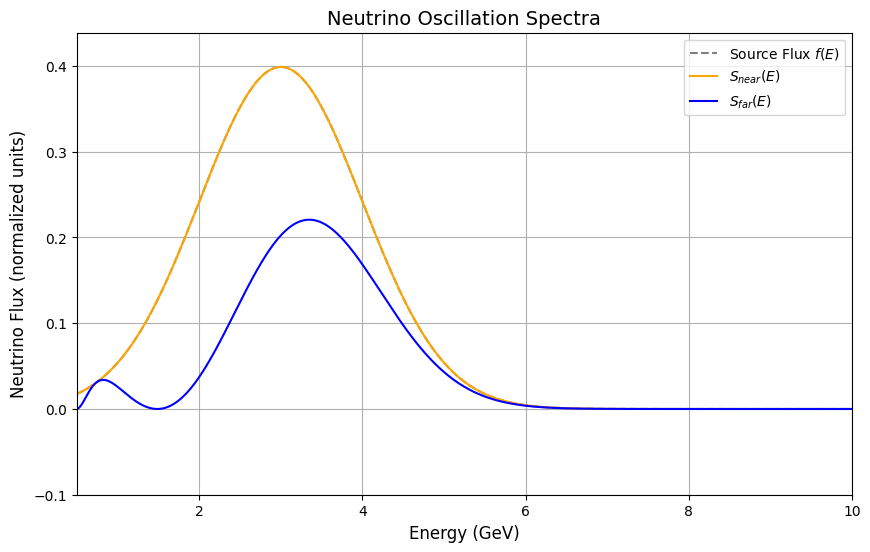

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L_near = 1   # Near Detector Baseline in km
L_far = 735  # Far Detector Baseline in km
energy = np.linspace(0.5, 10, 500)  # Energy in GeV

# Source flux (normalized Gaussian)
def source_flux(E, peak=3.0, width=1.0):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((E - peak) / width) ** 2)

# Near Detector Spectrum
def S_near(E):
    return source_flux(E) * (1 - np.sin(3.175e-3 * L_near / E)**2)

# Far Detector Spectrum
def S_far(E):
    return source_flux(E) * (1 - np.sin(3.175e-3 * L_far / E)**2)

# Calculate spectra
flux = source_flux(energy)
spectrum_near = S_near(energy)
spectrum_far = S_far(energy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energy, flux, label='Source Flux $f(E)$', color='gray', linestyle='--')
plt.plot(energy, spectrum_near, label='$S_{near}(E)$', color='orange')
plt.plot(energy, spectrum_far, label='$S_{far}(E)$', color='blue')

# Customizing the plot
plt.xlabel('Energy (GeV)', fontsize=12)
plt.ylabel('Neutrino Flux (normalized units)', fontsize=12)
plt.title('Neutrino Oscillation Spectra', fontsize=14)
plt.legend()
plt.grid()
plt.xlim(0.5, 10)
plt.ylim(-0.1, max(spectrum_far.max(), spectrum_near.max()) * 1.1)  # Adjusting Y-axis limits

# Show the plot
plt.show()


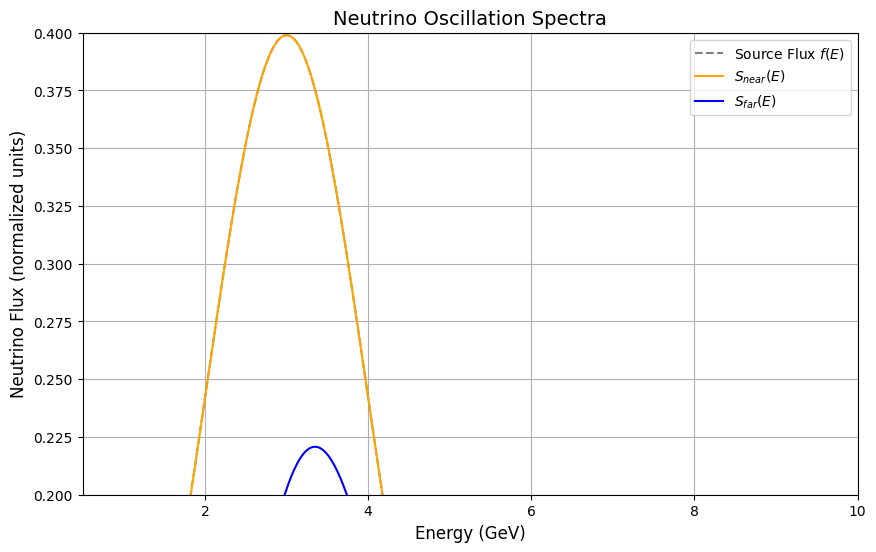

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L_near = 1   # Near Detector Baseline in km
L_far = 735  # Far Detector Baseline in km
energy = np.linspace(0.5, 10, 500)  # Energy in GeV

# Source flux (normalized Gaussian)
def source_flux(E, peak=3.0, width=1.0):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((E - peak) / width) ** 2)

# Near Detector Spectrum
def S_near(E):
    return source_flux(E) * (1 - np.sin(3.175e-3 * L_near / E)**2)

# Far Detector Spectrum
def S_far(E):
    return source_flux(E) * (1 - np.sin(3.175e-3 * L_far / E)**2)

# Calculate spectra
flux = source_flux(energy)
spectrum_near = S_near(energy)
spectrum_far = S_far(energy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energy, flux, label='Source Flux $f(E)$', color='gray', linestyle='--')
plt.plot(energy, spectrum_near, label='$S_{near}(E)$', color='orange')
plt.plot(energy, spectrum_far, label='$S_{far}(E)$', color='blue')

# Customizing the plot
plt.xlabel('Energy (GeV)', fontsize=12)
plt.ylabel('Neutrino Flux (normalized units)', fontsize=12)
plt.title('Neutrino Oscillation Spectra', fontsize=14)
plt.legend()
plt.grid()

# Set limits for the axes
plt.xlim(0.5, 10)
plt.ylim(0.2, 0.4)  # Set Y-axis limits from 0.2 to 0.4

# Show the plot
plt.show()


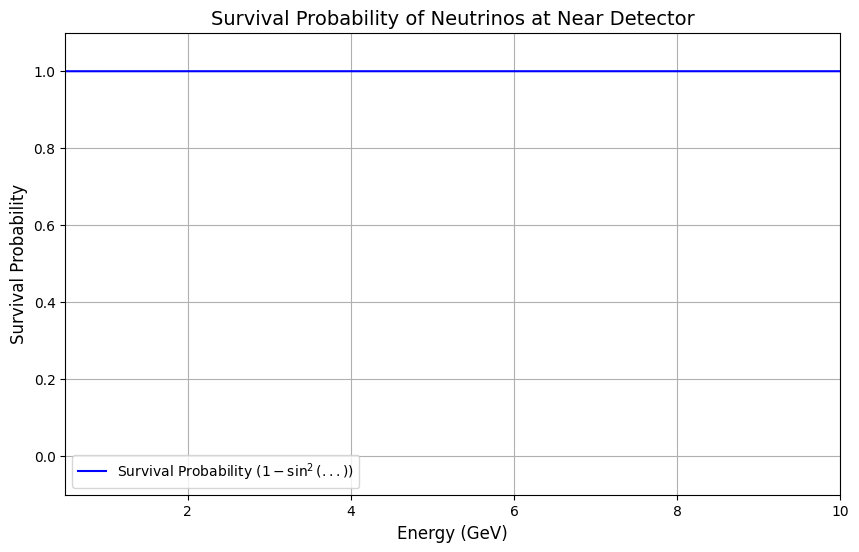

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L_near = 1  # Near Detector Baseline in km
energy = np.linspace(0.5, 10, 500)  # Energy in GeV

# Calculate the expression
survival_probability_near = 1 - np.sin(3.175e-3 * L_near / energy)**2

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energy, survival_probability_near, label='Survival Probability $(1 - \sin^2(...))$', color='blue')

# Customizing the plot
plt.xlabel('Energy (GeV)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.title('Survival Probability of Neutrinos at Near Detector', fontsize=14)
plt.legend()
plt.grid()
plt.xlim(0.5, 10)
plt.ylim(-0.1, 1.1)  # Set Y-axis limits from -0.1 to 1.1 for better visualization

# Show the plot
plt.show()


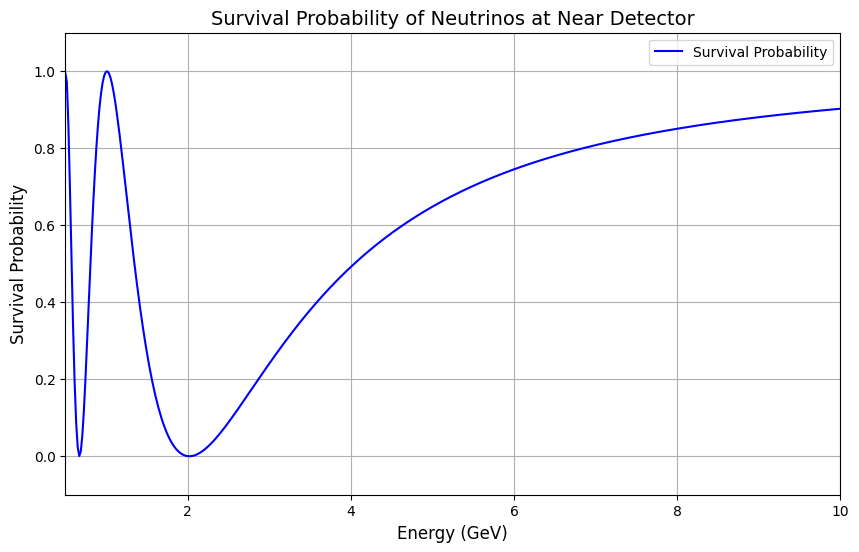

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L_near = 1e3  # Near Detector Baseline in meters (1 km = 1000 m)
energy = np.linspace(0.5, 10, 500)  # Energy in GeV

# Calculate the expression
survival_probability_near = 1 - np.sin(3.175e-3 * L_near / energy)**2

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(energy, survival_probability_near, label='Survival Probability', color='blue')

# Customizing the plot
plt.xlabel('Energy (GeV)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.title('Survival Probability of Neutrinos at Near Detector', fontsize=14)
plt.legend()
plt.grid()
plt.xlim(0.5, 10)
plt.ylim(-0.1, 1.1)  # Set Y-axis limits from -0.1 to 1.1 for better visualization

# Show the plot
plt.show()


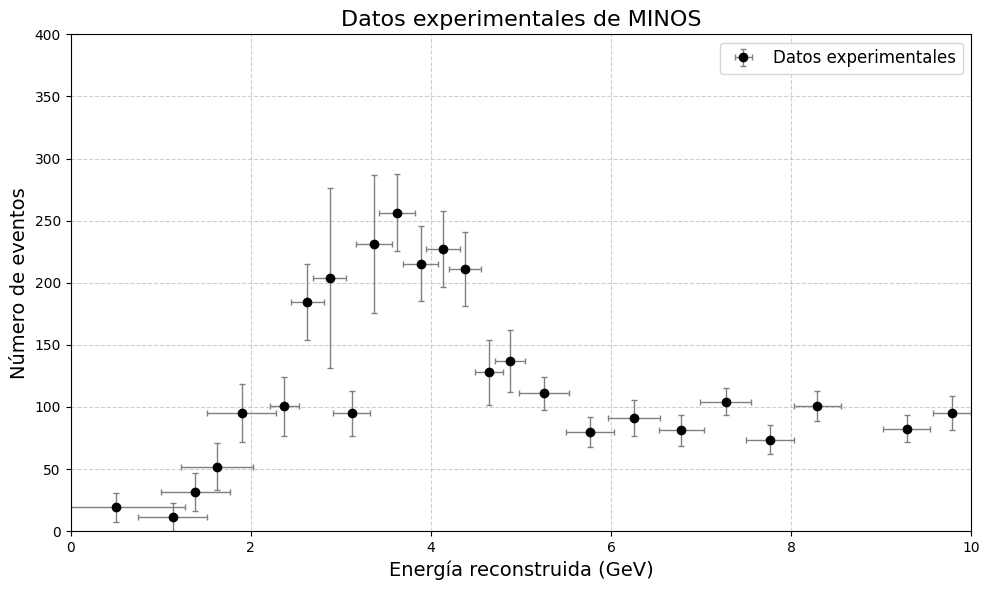

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos experimentales
eventos = [19.304, 11.652, 31.826, 52.000, 95.130, 100.700, 184.170, 203.650, 95.130, 231.480,
           256.520, 215.480, 227.300, 211.300, 127.830, 136.870, 111.130, 79.826, 90.957, 81.217,
           104.170, 73.565, 100.700, 82.609, 95.130]
energia = [0.5056, 1.1344, 1.3810, 1.6261, 1.8985, 2.3746, 2.6297, 2.8748, 3.1188, 3.3657,
           3.6242, 3.8864, 4.1320, 4.3791, 4.6439, 4.8759, 5.2604, 5.7684, 6.2602, 6.7802,
           7.2718, 7.7660, 8.2904, 9.2841, 9.7894]
incertidumbre_eventos = [11.826, 11.131, 15.304, 18.783, 23.65, 23.65, 30.61, 72.35, 18.08, 55.65,
                         31.31, 29.92, 30.61, 29.92, 26.43, 24.87, 13.29, 12.08, 14.643, 12.554,
                         10.88, 11.726, 11.97, 10.648, 13.88]
incertidumbre_energia = [0.7693, 0.3821, 0.3831, 0.3997, 0.3801, 0.1616, 0.1822, 0.1849, 0.2068, 0.2005,
                         0.2040, 0.1915, 0.1901, 0.1824, 0.1557, 0.1683, 0.2782, 0.2630, 0.2878, 0.2512,
                         0.2788, 0.2642, 0.2595, 0.2614, 0.2106]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.errorbar(energia, eventos, yerr=incertidumbre_eventos, xerr=incertidumbre_energia,
             fmt='o', color='black', ecolor='gray', elinewidth=1, capsize=2, label='Datos experimentales')

# Etiquetas y título
plt.title('Datos experimentales de MINOS', fontsize=16)
plt.xlabel('Energía reconstruida (GeV)', fontsize=14)
plt.ylabel('Número de eventos', fontsize=14)
plt.xlim(0, 10)
plt.ylim(0, 400)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar la gráfica
plt.tight_layout()
plt.show()
